<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Linear Algebra 
<br>
Prof. Hamid R. Rabiee
<br>
Dr. Maryam Ramezani
</font>
<br/>
<br/>
Fall 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - Q2 <br>
Jabr News

(65% of the overall project grade)
            	<br/>
			</font>
<font size=4>
			<br/><br/>
<font color=red>
Please run all the cells.
     </font>
</font>
<br>
<font size=3 color=grey>
</font>
    </div>

Name: Parham Rezaei
<br>
Student Number: 400108547


# JABR NEWS
The JabrNews system, which has been established recently, has managed to find a lot of news from all over the world daily and put it in its system. Despite the site being new, it has attracted alot of fans.
<br>
<br>
This system receives a lot of news every day, most of which are about certain topics, and should be classified by a system. Unfortunately, due to the low speed of the internet, today their system does not have the ability to do the task, so they need your help to do this for them.
<br>
<br>
Take the following steps to fulfil the task.
<br>
<br>
Import any libraries that you may need.


 

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
NUM = 4000

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import numpy as np
import nltk
import gc

gc.collect()

0

In [4]:
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import PorterStemmer
import nltk.stem as stem
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Matrix ( 30 points )
<br>
<br>
First, we need to create the data matrix to be able to work with it. We consider each file as a row of this matrix.
<br>
<br>
Before creating this matrix, it is necessary to prepare the corpus related to these files. Corpus is the set of all words that are in the text files. Also, note that you will be given a file called stopwords that you should not include in the corpus.
<br>
<br>
The second thing you should consider is that words like Programming, Programmer are counted as one word. For this, you can use the nltk library.
<br>
<br>
(If you have a problem in building the corpus or the number of words in the corpus exceeds some limit, you can first find the number of repetitions of each word in the corpus and use a limited number of them.)



### Subtask 1 : Create corpus 

In [5]:
texts = []
bw = ""
stemmer = PorterStemmer()
wnl = stem.WordNetLemmatizer()
for file_id in range(0,NUM):
    path = 'drive/MyDrive/Data/News/{}'.format(file_id)
    with open(path,'rb') as f:
        contents = f.read()
        contents = contents.decode('latin-1')
        texts.append(contents)
        print(file_id)
    # tokenize the text into words
        # tokens = nltk.word_tokenize(contents)
        # tokens = [wnl.lemmatize(w) for w in tokens]
        # tokens = [stemmer.stem(i) for i in tokens]
        # words += tokens

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
import nltk

from nltk.tokenize import word_tokenize
from collections import Counter
stemmer = PorterStemmer()
wnl = stem.WordNetLemmatizer()
tokens = []
for text in texts:
  words = word_tokenize(text)
  words = [stemmer.stem(wnl.lemmatize(w)) for w in words] # add not in stopword 
  tokens.append(words)


In [7]:
del texts
gc.collect()

0

In [8]:
stopword = []
stemmer = PorterStemmer()
wnl = stem.WordNetLemmatizer()
with open("drive/MyDrive/Data/stopwords.txt",'r') as f:
  contents = f.read()
  stp = nltk.word_tokenize(contents)
  stopword += stp
  stp = [wnl.lemmatize(w) for w in stp]
  stp = [stemmer.stem(i) for i in stp]
  stopword += stp

stopword = set(stopword)

In [9]:
for i in range(len(tokens)):
  tokens[i] = [l for l in tokens[i] if l not in stopword]

In [10]:
#method 1
word_counts = [Counter(token) for token in tokens]
word_total_appearance =  {}
for c in word_counts:
  for word in c:
    if word not in word_total_appearance:
      word_total_appearance[word] = 1
    else:
      word_total_appearance[word] = word_total_appearance[word] + 1
#allwords = list(word_total_appearance.keys())
#data_matrix = np.zeros((NUM,len(allwords)))



In [11]:
appnums = [i for i in word_total_appearance.values()]
wordapps = sorted(appnums)
thresh = wordapps[-500]
allwords = list()
for word in word_total_appearance.keys():
  if word_total_appearance[word] >= thresh:
    allwords.append(word)
data_matrix = np.zeros((NUM,len(allwords)))

In [12]:
vocab_index = {word: index for index,word in enumerate(allwords)}
for i,count in enumerate(word_counts):
  for word,freq in count.items():
    if word not in allwords:
      continue
    data_matrix[i][vocab_index[word]] = freq

In [13]:
index_vocab = {index: word for index,word in enumerate(allwords)}


In [14]:
lenallwords = len(allwords)
del word_counts
del allwords
gc.collect()

0

Now, according to the corpus we created, we need to create an initial data matrix. In such a way that the index $ij$ in the matrix $Y$ has the value $k$ if the word $j$ is repeated $k$ times in the corpus in the text $i$.


### Subtask 2 : Create initial data matrix

In this part, we want to complete the data matrix. Consider the following definitions:
    <br>
    <br>
$$
t_{ij} = Y_{ij}
$$
    <br>
    <br>
$$
\text{idf}_{i} = \text{Number of text files having word }i\text{ in corpus}
$$
    <br>
    <br>
    $$
    N = \text{Number of text files}
    $$
    <br>
    <br>
Note that here $t$ is the number of word repetitions in a text. According to these definitions, the data matrix is ​​defined as follows:
<br>
    <br>
    $$
    X_{ij} = t_{ij}\times\text{Log}(\frac{N}{\text{idf}_j})
    $$
    <br>
    <br>
This method is called tf-idf. Finally, each row of the data matrix must have a norm of 1.

### Subtask 3 : Create Data matrix

In [15]:

N = NUM

for j in range(lenallwords):
  data_matrix[:,j] = data_matrix[:,j] * np.log(N/word_total_appearance[index_vocab[j]])

#make normal

In [16]:

del vocab_index
#del index_vocab
gc.collect()

0

In [17]:

data_matrix = data_matrix/data_matrix.sum(axis=1)[:,np.newaxis]
np.nan_to_num(data_matrix)

<ipython-input-17-0a6a08d82449>:1: RuntimeWarning: invalid value encountered in true_divide
  data_matrix = data_matrix/data_matrix.sum(axis=1)[:,np.newaxis]


array([[0.04068826, 0.05292444, 0.03531749, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01030557, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.012191  , 0.        , 0.        , ..., 0.        , 0.00997526,
        0.        ]])

# SVD ( 30 points )
<br>
<br>
Here we present the first solution. Using SVD, we try to write the matrix $X$ which is $N\times\text{Corpus}$ in the form $VU$ in which we have $V_{N\times k}$ and $U_{k\times C}$.
<br>
<br>
(If the execution of SVD takes a long time, you can limit the number of words in the corpus as desired.)


### Subtask 1 : Run SVD on Data Matrix


In [18]:
Z=data_matrix

In [19]:
np.nan_to_num(Z,0)
Z[np.isinf(Z)] = 0

In [20]:
(U,S,Vh) = np.linalg.svd(Z,full_matrices=True)
k = 10
S1 = S[:k]
U1 = U[:,:k]
V1 = Vh[:k,:]
U1 = U1 @ np.diag(S1)
U1,V1 = V1,U1


Now, having the SVD answer, take an arbitrary number (for example, $k = 10$) to pick the largest values of $\sigma$ and select its corresponding vectors in $U$ and $V$. (Multiply the value of $\sigma$ in one of $U$ or $V$ so that we can write $X$ as a product of $VU$.)
    <br>
    <br>
    $$
    X = VU
    $$
    <br>
    <br>
Now if we have:
<br>
<br>
$$V = \begin{bmatrix}v_1^T\\\vdots\\v_N^T\end{bmatrix}\quad,\quad v_i \in \mathbb{R}^k\quad,\quad U\in\mathbb{R}^{k\times C}$$
<br>
<br>
As a result, each line of $X$ is written as follows.
<br>
<br>
$$
    X = \begin{bmatrix}v_1^TU\\\vdots\\v_N^TU\end{bmatrix}$$
<br>
<br>
Now, this expression can be interpreted in such a way that each of the $k$ rows in $U$ specify a specific topic. And each of the $v_i^t$ elements specifies how much the text $i$ is related to that topic. Basically, we are trying to display each text as a linear combination of several different topics.
<br>
    <br>
For $k=10$ different topics, specify which topic each text belongs to.
### Subtask 2 : Use SVD for clustering

In [21]:
np.isclose(np.dot(U[1,:],U[3,:]),0)
test_labels = []
for i in range(N):
  amax = np.argmax(V1[i,:])
  test_labels.append(amax)
  print(amax)
#Um = U[amax,:]
#topC = np.argpartition(Um, -10)[-10:]


2
2
2
2
5
2
2
7
2
2
2
4
2
2
2
2
6
8
2
2
2
2
9
2
2
2
2
2
5
7
2
2
2
2
5
2
2
2
2
2
2
2
2
8
2
8
2
2
7
2
2
2
2
2
2
3
2
2
2
2
3
2
3
2
6
9
1
8
9
2
8
2
9
3
2
2
2
6
2
1
2
9
7
2
7
2
1
3
7
2
3
2
2
3
3
3
2
9
7
2
9
2
4
9
3
2
2
3
2
2
2
5
2
0
2
8
2
3
2
1
2
2
3
2
1
9
2
9
9
3
3
4
3
3
2
8
2
1
2
8
7
2
1
2
2
3
2
2
2
3
2
3
2
2
2
6
2
5
1
7
3
2
6
6
1
2
2
1
1
2
2
3
2
2
2
3
3
2
6
3
9
1
3
3
2
3
2
2
2
3
2
9
3
2
4
8
2
2
2
2
5
2
2
2
2
2
3
2
2
2
2
2
8
9
5
2
4
2
2
2
2
3
1
2
2
2
9
2
7
7
2
2
2
3
2
3
5
2
2
2
1
2
3
3
2
2
2
1
2
2
2
2
2
2
2
9
4
2
2
2
4
1
2
2
6
2
5
5
5
2
4
2
2
2
9
4
2
9
2
8
8
2
2
2
2
2
8
9
9
9
8
2
9
7
2
4
2
2
4
2
2
9
2
8
2
2
2
2
2
2
2
2
2
9
4
9
4
8
2
8
2
9
8
8
2
2
2
8
2
2
2
2
2
2
3
9
8
2
2
2
2
2
5
3
1
2
2
2
1
2
2
2
2
4
2
5
3
5
2
2
2
8
2
8
5
8
8
8
2
2
2
2
9
3
8
3
2
4
2
2
2
9
2
8
2
2
3
2
2
3
8
2
2
5
2
9
5
2
2
9
2
7
2
5
2
8
8
3
2
7
2
2
2
6
2
3
6
2
2
3
2
2
9
2
8
2
2
8
5
8
2
2
7
2
2
2
2
8
9
2
3
3
8
3
2
6
2
8
5
2
5
5
6
2
3
2
2
2
3
7
3
2
2
2
7
8
1
4
2
2
3
8
2
5
2
4
5
2
3
2
6
3
3
3
5
2
9
2
3
2
5
4
2
2
2
2
2
9
1
2


In the $U$ matrix where the topics are in the rows, we know that every 2 rows are perpendicular to each other. Is this assumption correct for different subjects?
    <br>
    <br>
    What does it mean if the coefficient of a subject is negative for a particular text? Do we have the power to interpret negative coefficients?

In this part, we want to measure the accuracy of the model. At first, it is necessary to project the $X$ matrix that we made earlier using PCA, on 2 dimensions and assign to each of points a color corresponding to their labels that you obtained in Subtask 2.

### Subtask 3 : Use PCA on X and labels

In [23]:
def pca(Z,numcomponents):
  d=Z
  d_nrml = d-d.mean()
  cov = np.cov(d_nrml,rowvar=False)
  eig_val, eig_vec = np.linalg.eig(cov)
  e_indices = np.argsort(eig_val)[::-1]
  eig_vec_sorted = eig_vec[:,e_indices]
  eig_val_sorted = eig_val[e_indices]
  eig_vec_subset = eig_vec_sorted[:,0:numcomponents]
  x_reduced = np.dot(eig_vec_subset.T,d_nrml.T).T
  return x_reduced

In [35]:
z_reduced = pca(Z,2)
principal_df = pd.DataFrame(z_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(test_labels)] , axis = 1)


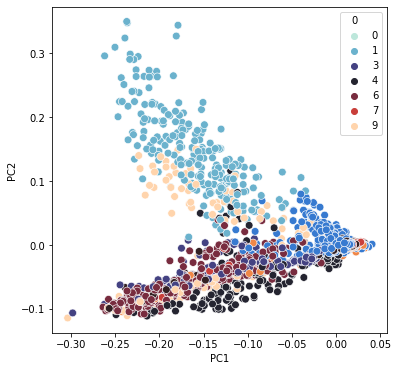

In [37]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2', hue=0, s = 60 , palette= 'icefire')


# New Factorizaion ( 30 points )
<br>
<br>
As you must have noticed in the previous section, there is room for improvement compared to the SVD method. Here we introduce a new method that has advantages over SVD.
<br>
<br>
Here we try to write the matrix $X$ in the form $X \sim WH$. But contrary to the SVD method, we try to ensure that all the domains of $H$ and $W$ are positive, and with this condition, we seek to find $H$ and $W$ that minimize the following function:
<br>
    <br>
    $$
    J = \lVert X - WH\lVert^2_F
    $$
<br>
    <br>
Use the following algorithm to find such two matrices.
<br>
    <br>
    First, create the matrix $W$ and $H$ with random positive elements. Next, repeat the following step max_iter times and save $H, W$ for which we have the least error.
    <br>
    <br>
    $$
    H_{ij} := H_{ij}\frac{(W^TX)_{ij}}{(W^TWH + 10^{-9})_{ij}}
    $$
    $$
    W_{ij} := W_{ij}\frac{(XH^T)_{ij}}{(WHH^T + 10^{-9})_{ij}}
    $$
    <br>
    <br>
Considering that the answer of $W$ and $H$ is not unique, it is necessary to set the norm of each row of $H$ equal to 1 in each step after the update and also apply a change in $W$ that the answer of their multiplication Does not change.

### Subtask 1 : Find W, H.

In [38]:
max_iter=1000

In [40]:
m, n = data_matrix.shape
d=20
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [41]:
def normalizeHW(H,W):
  for i in range(d):
    s = np.sum(H[i,:])
    H[i,:] = H[i,:]/s
    W[:,i] = W[:,i]*s

  return (H,W)

In [42]:
def optimize(X,W,H):
  Hnumerator = W.T @ X
  Hdenominator = (W.T @ W @ H) + 1e-9
  HTemp = np.divide(Hnumerator,Hdenominator)
  Wnumerator = X @ H.T
  Wdenominator = (W @ H @ H.T) + 1e-9
  WTemp = np.divide(Wnumerator, Wdenominator)
  return (np.multiply(H,HTemp),np.multiply(W,WTemp))

for i in range(max_iter):
  H,W = optimize(data_matrix,W,H)
  H,W = normalizeHW(H,W)

Now, as in the previous section, we want to know what topic each text belongs to. Each topic is a row of $H$ and we have no requirement for them to be perpendicular to each other. For $k=10$ determine what topic each text belongs to.
    <br>
    <br>
    As in the previous section, measure the accuracy of this method intuitively.
### Subtask 2 : Use W, H for clustering

In [43]:
for i in range(N):
  print(np.argmax(W[i,:]))

12
15
12
12
12
12
12
15
5
12
12
9
5
12
12
18
14
9
12
12
5
12
9
12
12
18
12
12
15
15
2
18
12
12
12
18
12
12
12
18
12
18
12
12
9
9
18
12
15
18
15
18
12
2
12
13
12
4
18
12
7
12
19
12
7
10
7
9
19
12
19
0
19
7
9
12
4
7
12
6
9
7
15
12
15
12
7
13
10
4
10
18
12
7
18
13
12
19
15
12
19
4
1
19
7
18
4
13
12
4
12
15
12
0
12
8
12
7
18
5
18
4
10
12
0
6
12
19
19
13
13
1
13
18
12
8
6
17
12
8
15
12
17
15
18
7
12
4
12
13
4
18
12
18
4
7
4
15
7
15
12
4
7
7
7
4
12
7
17
12
12
13
12
12
12
7
7
9
7
7
16
0
18
13
12
13
12
12
4
6
12
19
13
18
7
12
12
18
12
12
10
12
12
12
12
12
13
12
12
12
12
12
8
19
12
12
1
12
12
12
12
13
17
12
12
12
19
12
15
15
12
18
18
18
12
13
15
12
6
18
17
12
13
13
12
12
12
6
12
18
12
4
12
12
12
7
1
12
18
12
10
17
12
18
7
4
11
15
11
12
1
18
12
12
7
1
12
18
4
12
9
5
12
12
12
12
9
16
9
16
9
12
9
15
12
1
12
12
9
12
18
16
12
9
5
18
2
12
18
9
18
12
2
9
12
18
1
12
12
9
12
0
12
9
15
12
9
12
12
12
12
12
12
12
13
6
12
12
2
4
4
5
15
4
7
12
4
5
10
12
12
12
2
9
12
7
13
15
18
12
12
9
12
0
12
9
9
9
12
18
12



Has the constrain on $W, H$ helped us with the clustering? Explain.
</br>
We don't have anymore negative coefficients that we can't interpret. they are just weights of each topic. that can be zero or more

In this section, in addition to specifying the topic of each text, you must also specify the topic itself. This means that some of the largest values in row $i$ in matrix $H$, which is a word in the corpus, determine what the general scope of a subject is.

### Subtask 3 : Show some of the topics

In [44]:
for i in range(10):
  Um = H[i]
  topC = np.argpartition(Um, -10)[-10:]
  ws = [index_vocab[i] for i in topC]
  print(ws)

['save', 'note', 'gain', 'shr', 'dlr', 'net', 'includ', '3rd', 'mth', 'qtr']
['-', 'reserv', 'deficit', 'yen', 'net', 'surplu', 'loan', 'asset', 'billion', 'deposit']
['hold', 'trader', 'board', 'shipment', 'expir', 'share', 'bid', 'buy', 'offer', 'tender']
['sept', '35', 'group', '12', 'ct', 'qtr', 'net', '4th', 'shr', 'avg']
['buy', 'sell', 'agre', 'unit', 'acquisit', 'undisclos', 'term', 'corp', 'acquir', 'complet']
['compani', 'ga', 'properti', 'produc', 'south', 'gold', 'mine', 'open', 'reserv', 'product']
['share', 'note', 'discontinu', 'quarter', 'unit', '1986', 'dlr', 'gain', 'exclud', 'oper']
['28', '4th', '2nd', '31', 'ct', 'net', 'shr', 'rev', 'qtr', 'mth']
['1.5', 'fund', 'week', 'system', 'custom', 'feder', 'reserv', 'set', 'repurchas', 'fed']
['day', 'money', 'franc', 'cut', 'rise', 'stg', '-', 'pct', 'rate', 'bank']
